In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv("E:/Top Mentor/Datasets/Students.csv")
print(data.head(2))

      JEEPRE   JEEMAINS  STATUS
0  34.623660  78.024693       0
1  30.286711  43.894998       0


In [3]:
###### Analysis of the Data - EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   JEEPRE    100 non-null    float64
 1   JEEMAINS  100 non-null    float64
 2   STATUS    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


C:\Users\PROYAS BOSE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


65.64427405779999


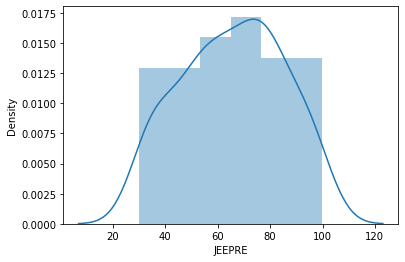

In [9]:
sns.distplot(data['JEEPRE'])
print(data['JEEPRE'].mean())

C:\Users\PROYAS BOSE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


66.22199808840003


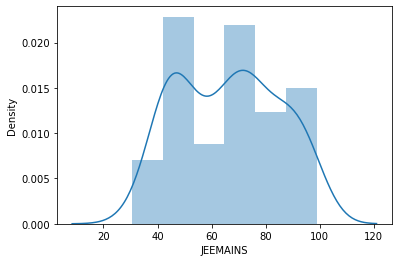

In [11]:
sns.distplot(data['JEEMAINS'])
print(data['JEEMAINS'].mean())

In [12]:
print(data.describe())

           JEEPRE    JEEMAINS      STATUS
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


<AxesSubplot:xlabel='JEEMAINS', ylabel='JEEPRE'>

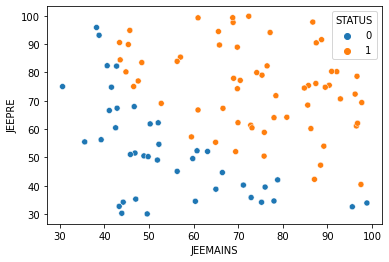

In [16]:
sns.scatterplot(x = 'JEEMAINS',y = 'JEEPRE',hue = 'STATUS',data = data)

In [17]:
######### Model Developmenmt - 
data['STATUS'].value_counts()

1    60
0    40
Name: STATUS, dtype: int64

In [25]:
X = data[['JEEPRE','JEEMAINS']] #data.iloc[:,0:2]
y = data['STATUS'] #data.iloc[:,-1]

In [18]:
from sklearn.linear_model import LogisticRegression

In [50]:
start = time.time()
model = LogisticRegression()
model_train = model.fit(X,y)   ##### To fit the Model
end = time.time()
print("The Model Training is completed")
print("Time taken  - ",end - start)

1671254400.8641572
The Model Training is completed
Time taken  -  0.04100847244262695


In [28]:
predict = model_train.predict(X)
predict

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [39]:
model_train.classes_

array([0, 1], dtype=int64)

In [30]:
data['Predicted'] = predict

In [32]:
#data.to_csv("E:/Output.csv")

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [40]:
cm = confusion_matrix(y,predict)
print(cm)

[[34  6]
 [ 5 55]]


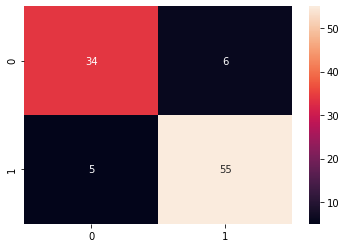

In [95]:
fig = sns.heatmap(cm, annot = True)
fig = fig.get_figure()
fig.savefig("E:/Cm.png")

In [35]:
acc = (34+55)/(34+55+5+6)
print(acc)

0.89


In [37]:
accuracy_score(y,predict)

0.89

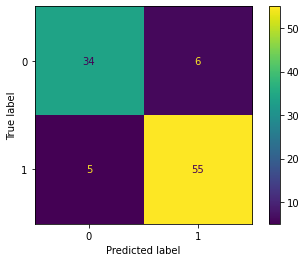

In [49]:
cmd = ConfusionMatrixDisplay(cm,display_labels=model_train.classes_).plot()

In [48]:
error = 1 - acc
print(error)

0.10999999999999999


In [51]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [53]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [54]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [55]:
print(df.head(2))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  


<AxesSubplot:xlabel='fare'>

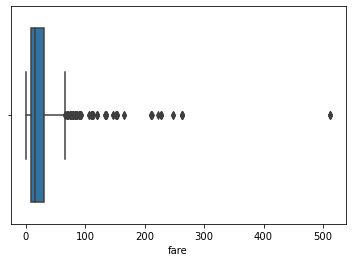

In [59]:
sns.boxplot(x = df['fare'])

In [60]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [62]:
df.shape

(891, 15)

In [64]:
df_1 = df[df['survived']==1]

In [65]:
df_0 = df[df['survived']==0].head(342)

In [68]:
df_new = pd.concat([df_1,df_0])
df_new.survived.value_counts()

0    342
1    342
Name: survived, dtype: int64

In [70]:
342/549

0.6229508196721312

In [71]:
40/60

0.6666666666666666

In [73]:
(549-342)/891

0.23232323232323232

In [74]:
df1 = sns.load_dataset('tips')
df1

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [75]:
df1['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [76]:
import numpy as np

In [79]:
df1['Spenders'] = np.where(df1['total_bill']>=25,"High_Spenders","Low Spenders")

In [80]:
df1

total_bill   tip     sex smoker   day    time  size       Spenders
0         16.99  1.01  Female     No   Sun  Dinner     2   Low Spenders
1         10.34  1.66    Male     No   Sun  Dinner     3   Low Spenders
2         21.01  3.50    Male     No   Sun  Dinner     3   Low Spenders
3         23.68  3.31    Male     No   Sun  Dinner     2   Low Spenders
4         24.59  3.61  Female     No   Sun  Dinner     4   Low Spenders
..          ...   ...     ...    ...   ...     ...   ...            ...
239       29.03  5.92    Male     No   Sat  Dinner     3  High_Spenders
240       27.18  2.00  Female    Yes   Sat  Dinner     2  High_Spenders
241       22.67  2.00    Male    Yes   Sat  Dinner     2   Low Spenders
242       17.82  1.75    Male     No   Sat  Dinner     2   Low Spenders
243       18.78  3.00  Female     No  Thur  Dinner     2   Low Spenders

[244 rows x 8 columns]

In [ ]:
##### Descion TRee and Random Forest - 11.22


In [81]:
X

JEEPRE   JEEMAINS
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
..        ...        ...
95  83.489163  48.380286
96  42.261701  87.103851
97  99.315009  68.775409
98  55.340018  64.931938
99  74.775893  89.529813

[100 rows x 2 columns]

In [82]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: STATUS, Length: 100, dtype: int64

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model_ds = DecisionTreeClassifier(criterion = 'entropy')

In [85]:
model_ds_train = model_ds.fit(X,y)
print("The Model is trained")

The Model is trained


In [86]:
predict1 = model_ds_train.predict(X)
predict1

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
confusion_matrix(y,predict1)

array([[40,  0],
       [ 0, 60]], dtype=int64)

<AxesSubplot:>

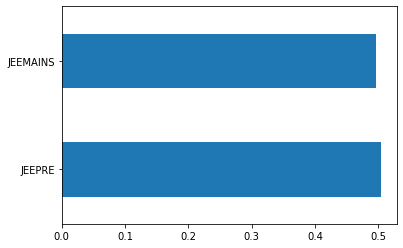

In [90]:
###### When Data is larger - DS Tree
fs = pd.Series(model_ds_train.feature_importances_, index = X.columns)
fs.plot(kind = 'barh')

In [91]:
fs

JEEPRE      0.503506
JEEMAINS    0.496494
dtype: float64

In [ ]:
H/w -  Titani Dataset and predict the survived based on different models - 
1. Logistic Regression
2. KNN Classification
3. Decision Tree

#### Which Models is best , What is the False Positive and false Negative rates for all the models
#### Confusion matrix has to be saved for the models in pdf format give proper title and xlabels and ylabels
#### Just your models preference based on the output that you have gathered.
#### Also show the important features using Decision Tree